# Machine Learning Halo Finder

In [1]:
import pynbody as pb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
s=pb.load('test_grafic++.02000')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pynbody/snapshot/tipsy.py:1519: RuntimeWarning: Paramfile suggests time is cosmological, but header values are not sensible in this context.
  "Paramfile suggests time is cosmological, but header values are not sensible in this context.", RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pynbody/snapshot/tipsy.py:130: RuntimeWarning: No readable param file in the run directory or parent directory: using defaults.
  "No readable param file in the run directory or parent directory: using defaults.", RuntimeWarning)


<IPython.core.display.Javascript object>


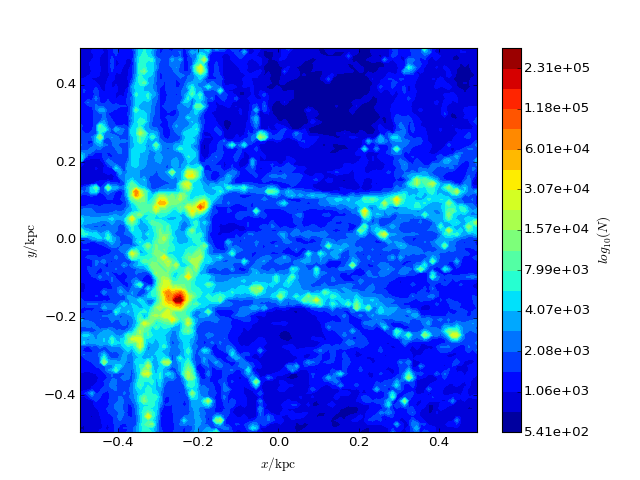

In [8]:
plt.figure()
hg = pb.plot.hist2d(s.d['x'], s.d['y'], colorbar=True)

<IPython.core.display.Javascript object>


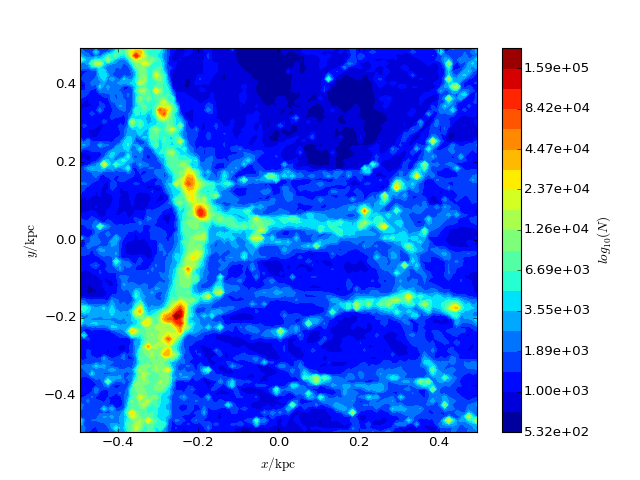

In [9]:
plt.figure()
p=pb.plot.hist2d(s.d['x'], s.d['z'], colorbar=True)

In [10]:
f=pb.filt.BandPass('x', '-0.1 kpc', '0.1 kpc')&pb.filt.BandPass('y', '-0.1 kpc', '0.1 kpc') & pb.filt.BandPass('z', '-0.1 kpc', '0.1 kpc')

In [11]:
len(s[f])

204592

<IPython.core.display.Javascript object>


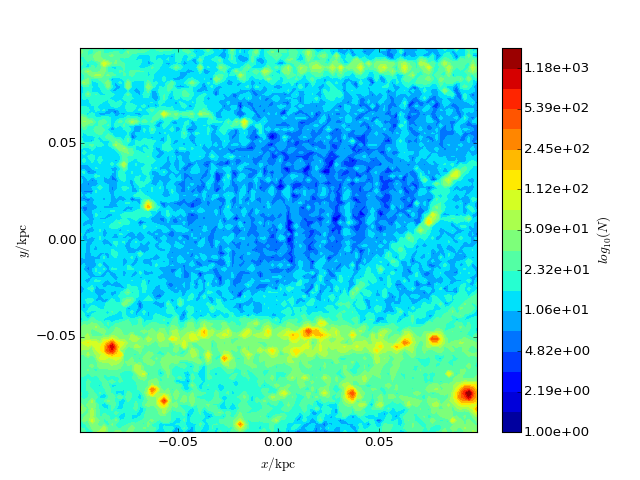

In [12]:
plt.figure()
h = pb.plot.hist2d(s[f].d['x'], s[f].d['y'], colorbar=True)

<IPython.core.display.Javascript object>


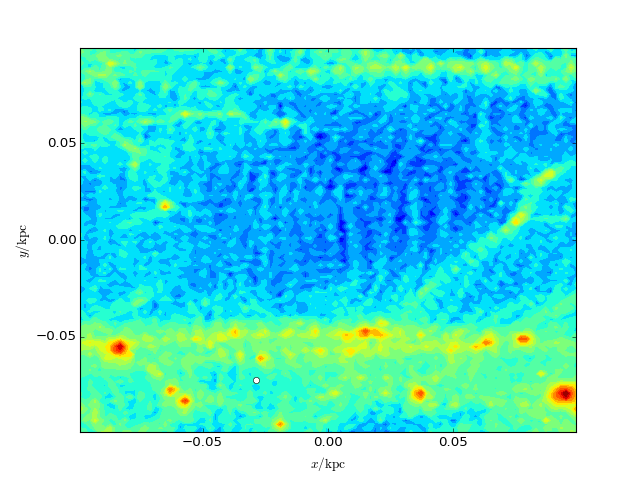

<IPython.core.display.Javascript object>


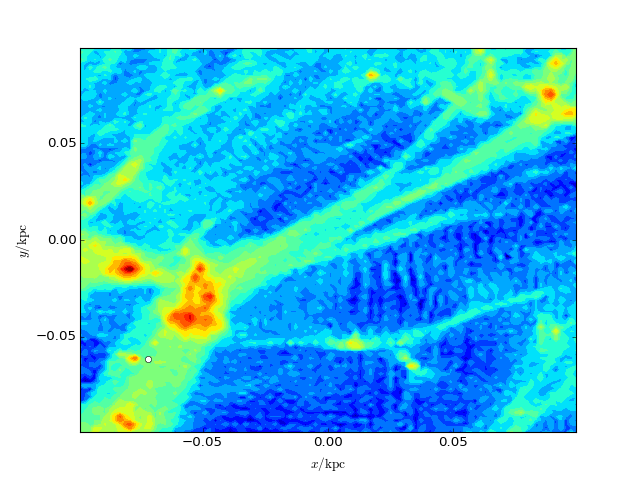

In [13]:
plt.figure()
v = pb.plot.hist2d(s[f].d['x'], s[f].d['y'])
ind=27837
plt.plot(s[f]['x'][ind], s[f]['y'][ind], 'o', color='white')

plt.figure()
v = pb.plot.hist2d(s[f].d['y'], s[f].d['z'])
plt.plot(s[f]['y'][ind], s[f]['z'][ind], 'wo')

In [14]:
# void = 0, filament = 1, halo = 2
train_class = [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1]
train_ind = [23465, 4371, 11112, 88888, 83764, 76149, 50112, 172653, 5, 198045, 23491, 2318, 27837]

In [16]:
features=[s[f].d['rho'], s[f].d['v_disp']]

In [20]:
features=np.array(features).T

In [27]:
X_train = features[train_ind]
y_train = train_class

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 5)

rf.fit(X_train, y_train)

rf_preds = rf.predict(features)
rf_predprob = rf.predict_proba(features)

Importance of density vs sigma:

In [30]:
rf.feature_importances_

array([ 0.60792078,  0.39207922])

In [28]:
sum(rf_preds == 2)

6754

<IPython.core.display.Javascript object>


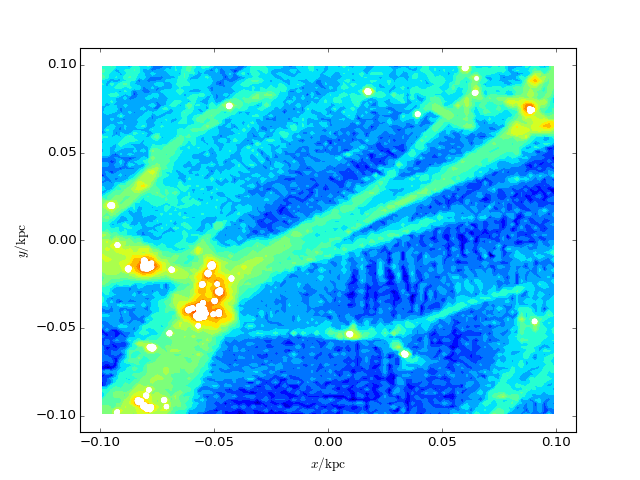

In [29]:
plt.figure()
v = pb.plot.hist2d(s[f].d['y'], s[f].d['z'])

plt.scatter(s[f].d['y'][rf_preds == 2], s[f].d['z'][rf_preds == 2], edgecolor="None", c='w')

<IPython.core.display.Javascript object>


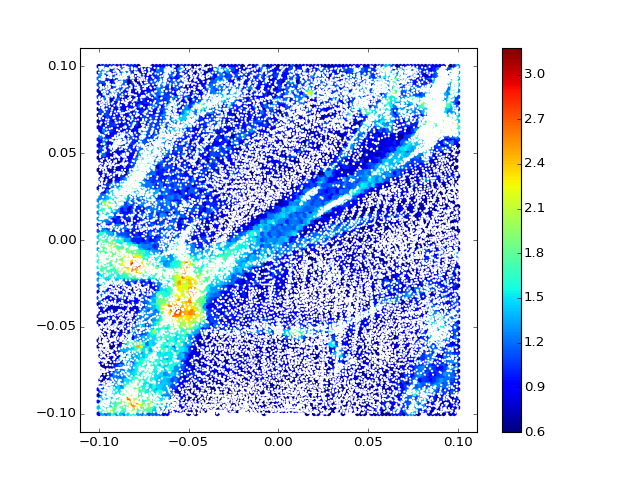

In [32]:
plt.figure()
v = plt.hexbin(s[f].d['y'], s[f].d['z'], bins = 'log', mincnt = 3)
plt.colorbar()
plt.scatter(s[f].d['y'][rf_preds == 0], s[f].d['z'][rf_preds == 0], edgecolor="None", c='w',s = 4)

<IPython.core.display.Javascript object>


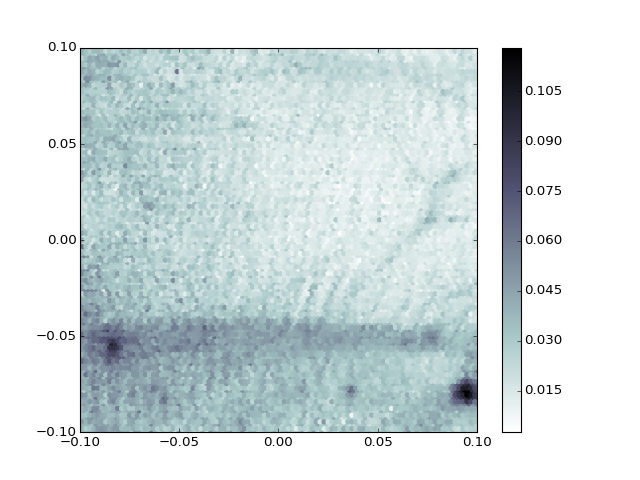

<matplotlib.colorbar.Colorbar instance at 0x18c4c9f38>

In [33]:
plt.figure()
v = plt.hexbin(s[f].d['x'], s[f].d['y'], C=features[:,1], cmap='bone_r')
plt.colorbar()

Results from clustering positional data:

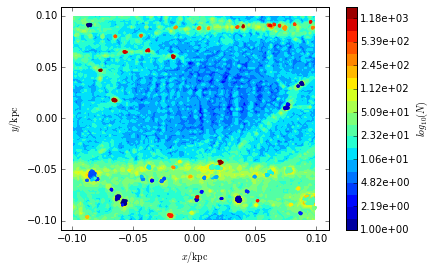

In [36]:
pb.plot.hist2d(s[f].d['x'], s[f].d['y'], colorbar=True)
plt.scatter(sub[nobkd,0], sub[nobkd,1], s=8, edgecolor='none' , c=labels[nobkd])